Данная лабораторная работа ориентирована на знакомство с применением двух методов обучения с учителем – k ближайших соседей и опорных векторов – в задачах классификации и регрессии с реализацией на языке программирования Python:

Сгенерировать данные, повторяющие примеры из лекций (U-образные, концентрические окружности, XOR, с выбросами), и реализовать на них различные версии метода k ближайших соседей в задачах классификации и регрессии, включая радиусный классификатор, взвешенные методы k ближайших соседей и ядерные функции.
Применить метод k ближайших соседей для решения задач классификации и регрессии с использованием собственных пользовательских данных.
Сгенерировать данные, повторяющие пример из лекций для полиномиального обогащения и реализовать решение задачи классификации с использованием метода опорных векторов.
Реализовать метод опорных векторов для различных ядерных функций для классификации модельных и реальных пользовательских данных.
Реализовать регрессионную версию метода опорных векторов и применить к собственным пользовательским данным.

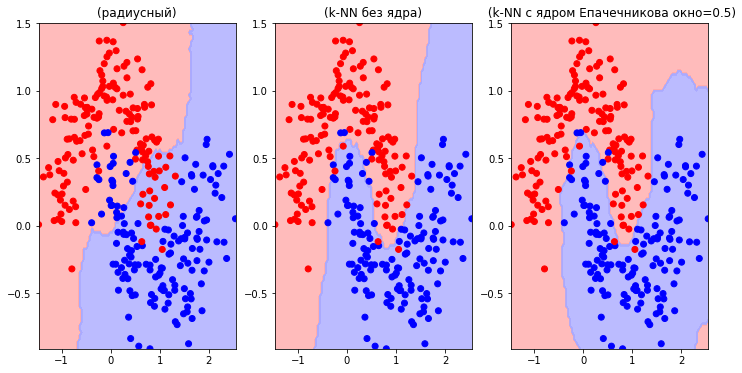

In [47]:

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.neighbors import RadiusNeighborsClassifier, KNeighborsClassifier



X, y = make_moons(n_samples=300, noise=0.2, random_state=42)





xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))


radius_classifier = RadiusNeighborsClassifier(radius=1)
knn_classifier = KNeighborsClassifier(n_neighbors=10) 
epanechnikov_kernel1 = lambda d: np.maximum(0, 3/4 * (1 - (d/0.5)**2))  
epanechnikov_kernel2 = lambda d: np.maximum(0, 3/4 * (1 - (d/6)**2))  
epanechnikov_kernel3 = lambda d: np.maximum(0, 3/4 * (1 - (d/100)**2))  
knn_kernel_classifier1 = KNeighborsClassifier(n_neighbors=10, weights=epanechnikov_kernel1) 
knn_kernel_classifier2 = KNeighborsClassifier(n_neighbors=10, weights=epanechnikov_kernel2) 
knn_kernel_classifier3 = KNeighborsClassifier(n_neighbors=10, weights=epanechnikov_kernel3) 


radius_classifier.fit(X, y)
Z_radius = radius_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_radius = Z_radius.reshape(xx.shape)


knn_classifier.fit(X, y)
Z_knn = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)




knn_kernel_classifier1.fit(X, y)
Z_custom_knn1 = knn_kernel_classifier1.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom_knn1 = Z_custom_knn1.reshape(xx.shape)

knn_kernel_classifier2.fit(X, y)
Z_custom_knn2 = knn_kernel_classifier2.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom_knn2 = Z_custom_knn2.reshape(xx.shape)

knn_kernel_classifier3.fit(X, y)
Z_custom_knn3 = knn_kernel_classifier3.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom_knn3 = Z_custom_knn3.reshape(xx.shape)



plt.figure(figsize=(12, 6))


plt.subplot(131)
plt.contourf(xx, yy, Z_radius, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title('(радиусный)')


plt.subplot(132)
plt.contourf(xx, yy, Z_knn, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title('(k-NN без ядра)')


plt.subplot(133)
plt.contourf(xx, yy, Z_custom_knn1, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title(' (k-NN с ядром Епачечникова окно=0.5)')



plt.show()

Text(0.5, 1.0, ' (k-NN с ядром Епачечникова окно=100)')

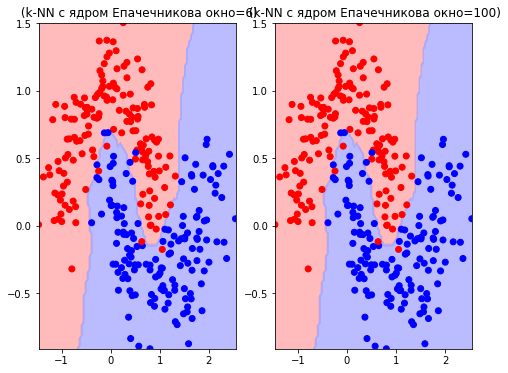

In [48]:
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.contourf(xx, yy, Z_custom_knn2, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title(' (k-NN с ядром Епачечникова окно=6)')

plt.subplot(132)
plt.contourf(xx, yy, Z_custom_knn3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title(' (k-NN с ядром Епачечникова окно=100)')

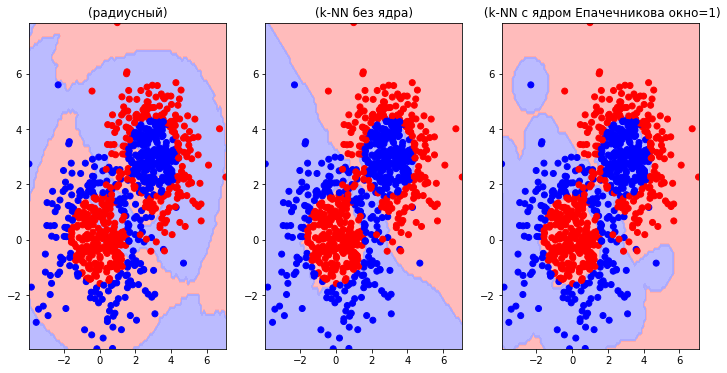

In [49]:
from sklearn import datasets

X1, y1 = datasets.make_gaussian_quantiles(cov=2.,
                                 n_samples=400, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = datasets.make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=400, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))


xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))


radius_classifier = RadiusNeighborsClassifier(radius=4)
knn_classifier = KNeighborsClassifier(n_neighbors=10) 
epanechnikov_kernel1 = lambda d: np.maximum(0, 3/4 * (1 - (d/1)**2))  
epanechnikov_kernel2 = lambda d: np.maximum(0, 3/4 * (1 - (d/6)**2))  
epanechnikov_kernel3 = lambda d: np.maximum(0, 3/4 * (1 - (d/100)**2))  
knn_kernel_classifier1 = KNeighborsClassifier(n_neighbors=10, weights=epanechnikov_kernel1) 
knn_kernel_classifier2 = KNeighborsClassifier(n_neighbors=10, weights=epanechnikov_kernel2) 
knn_kernel_classifier3 = KNeighborsClassifier(n_neighbors=10, weights=epanechnikov_kernel3) 


radius_classifier.fit(X, y)
Z_radius = radius_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_radius = Z_radius.reshape(xx.shape)


knn_classifier.fit(X, y)
Z_knn = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)




knn_kernel_classifier1.fit(X, y)
Z_custom_knn1 = knn_kernel_classifier1.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom_knn1 = Z_custom_knn1.reshape(xx.shape)

knn_kernel_classifier2.fit(X, y)
Z_custom_knn2 = knn_kernel_classifier2.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom_knn2 = Z_custom_knn2.reshape(xx.shape)

knn_kernel_classifier3.fit(X, y)
Z_custom_knn3 = knn_kernel_classifier3.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom_knn3 = Z_custom_knn3.reshape(xx.shape)



plt.figure(figsize=(12, 6))


plt.subplot(131)
plt.contourf(xx, yy, Z_radius, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title('(радиусный)')


plt.subplot(132)
plt.contourf(xx, yy, Z_knn, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title('(k-NN без ядра)')


plt.subplot(133)
plt.contourf(xx, yy, Z_custom_knn1, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title(' (k-NN с ядром Епачечникова окно=1)')



plt.show()

Text(0.5, 1.0, ' (k-NN с ядром Епачечникова окно=100)')

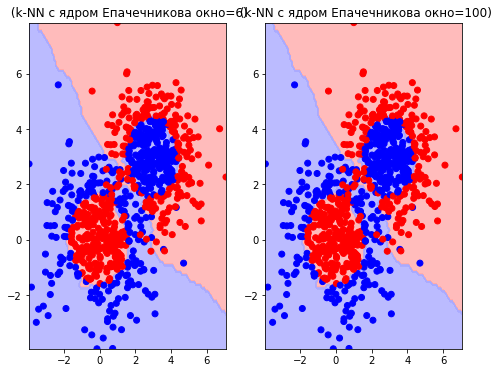

In [50]:
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.contourf(xx, yy, Z_custom_knn2, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title(' (k-NN с ядром Епачечникова окно=6)')

plt.subplot(132)
plt.contourf(xx, yy, Z_custom_knn3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title(' (k-NN с ядром Епачечникова окно=100)')

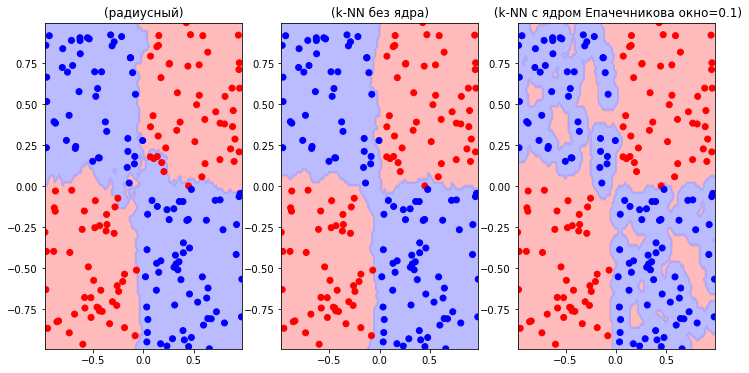

In [56]:
np.random.seed(0)
X= np.random.rand(200, 2) * 2 - 1
y= np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)

xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))


radius_classifier = RadiusNeighborsClassifier(radius=0.4)
knn_classifier = KNeighborsClassifier(n_neighbors=10) 
epanechnikov_kernel1 = lambda d: np.maximum(0, 3/4 * (1 - (d/0.1)**2))  
epanechnikov_kernel2 = lambda d: np.maximum(0, 3/4 * (1 - (d/6)**2))  
epanechnikov_kernel3 = lambda d: np.maximum(0, 3/4 * (1 - (d/100)**2))  
knn_kernel_classifier1 = KNeighborsClassifier(n_neighbors=10, weights=epanechnikov_kernel1) 
knn_kernel_classifier2 = KNeighborsClassifier(n_neighbors=10, weights=epanechnikov_kernel2) 
knn_kernel_classifier3 = KNeighborsClassifier(n_neighbors=10, weights=epanechnikov_kernel3) 


radius_classifier.fit(X, y)
Z_radius = radius_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_radius = Z_radius.reshape(xx.shape)


knn_classifier.fit(X, y)
Z_knn = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)




knn_kernel_classifier1.fit(X, y)
Z_custom_knn1 = knn_kernel_classifier1.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom_knn1 = Z_custom_knn1.reshape(xx.shape)

knn_kernel_classifier2.fit(X, y)
Z_custom_knn2 = knn_kernel_classifier2.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom_knn2 = Z_custom_knn2.reshape(xx.shape)

knn_kernel_classifier3.fit(X, y)
Z_custom_knn3 = knn_kernel_classifier3.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom_knn3 = Z_custom_knn3.reshape(xx.shape)



plt.figure(figsize=(12, 6))


plt.subplot(131)
plt.contourf(xx, yy, Z_radius, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title('(радиусный)')


plt.subplot(132)
plt.contourf(xx, yy, Z_knn, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title('(k-NN без ядра)')


plt.subplot(133)
plt.contourf(xx, yy, Z_custom_knn1, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title(' (k-NN с ядром Епачечникова окно=0.1)')



plt.show()

Text(0.5, 1.0, ' (k-NN с ядром Епачечникова окно=100)')

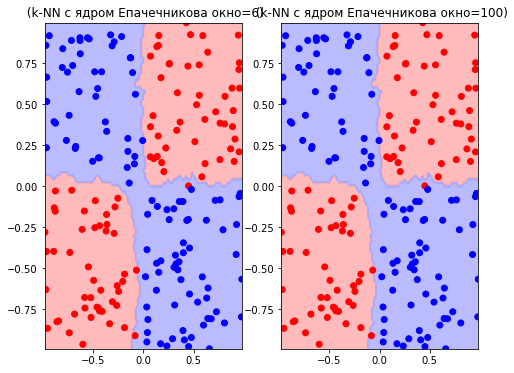

In [52]:
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.contourf(xx, yy, Z_custom_knn2, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title(' (k-NN с ядром Епачечникова окно=6)')

plt.subplot(132)
plt.contourf(xx, yy, Z_custom_knn3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title(' (k-NN с ядром Епачечникова окно=100)')

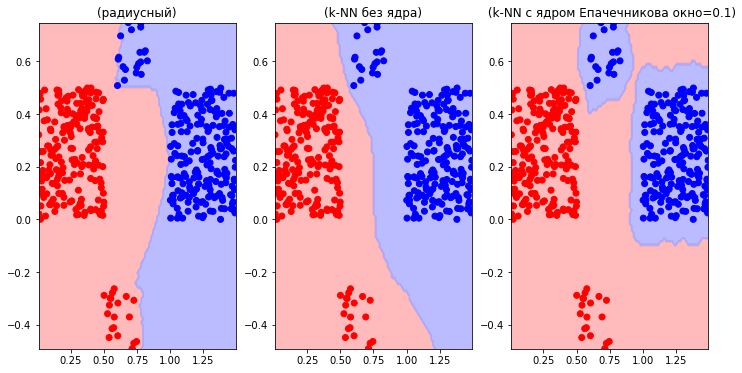

In [54]:
num_points_left = 200
X_left = np.random.rand(num_points_left, 2) * 0.5
y_left = np.zeros(num_points_left)
num_subcluster_left = 20
X_sub_left = np.random.rand(num_subcluster_left, 2) * 0.25 + [0.5, -0.5]
y_sub_left = np.zeros(num_subcluster_left)
num_points_right = 200
X_right = np.random.rand(num_points_right, 2) * 0.5 + [1, 0]
y_right = np.ones(num_points_right)
num_subcluster_right = 20
X_sub_right = np.random.rand(num_subcluster_right, 2) * 0.25 + [0.6, 0.5]
y_sub_right = np.ones(num_subcluster_right)
X = np.vstack((X_left, X_sub_left, X_right, X_sub_right))
y = np.hstack((y_left, y_sub_left, y_right, y_sub_right))



xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))


radius_classifier = RadiusNeighborsClassifier(radius=1)
knn_classifier = KNeighborsClassifier(n_neighbors=10) 
epanechnikov_kernel1 = lambda d: np.maximum(0, 3/4 * (1 - (d/0.1)**2))  
epanechnikov_kernel2 = lambda d: np.maximum(0, 3/4 * (1 - (d/6)**2))  
epanechnikov_kernel3 = lambda d: np.maximum(0, 3/4 * (1 - (d/100)**2))  
knn_kernel_classifier1 = KNeighborsClassifier(n_neighbors=10, weights=epanechnikov_kernel1) 
knn_kernel_classifier2 = KNeighborsClassifier(n_neighbors=10, weights=epanechnikov_kernel2) 
knn_kernel_classifier3 = KNeighborsClassifier(n_neighbors=10, weights=epanechnikov_kernel3) 


radius_classifier.fit(X, y)
Z_radius = radius_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_radius = Z_radius.reshape(xx.shape)


knn_classifier.fit(X, y)
Z_knn = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)




knn_kernel_classifier1.fit(X, y)
Z_custom_knn1 = knn_kernel_classifier1.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom_knn1 = Z_custom_knn1.reshape(xx.shape)

knn_kernel_classifier2.fit(X, y)
Z_custom_knn2 = knn_kernel_classifier2.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom_knn2 = Z_custom_knn2.reshape(xx.shape)

knn_kernel_classifier3.fit(X, y)
Z_custom_knn3 = knn_kernel_classifier3.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom_knn3 = Z_custom_knn3.reshape(xx.shape)



plt.figure(figsize=(12, 6))


plt.subplot(131)
plt.contourf(xx, yy, Z_radius, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title('(радиусный)')


plt.subplot(132)
plt.contourf(xx, yy, Z_knn, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title('(k-NN без ядра)')


plt.subplot(133)
plt.contourf(xx, yy, Z_custom_knn1, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title(' (k-NN с ядром Епачечникова окно=0.1)')



plt.show()



Text(0.5, 1.0, ' (k-NN с ядром Епачечникова окно=100)')

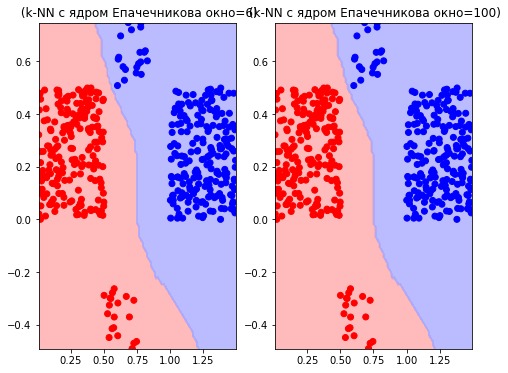

In [55]:
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.contourf(xx, yy, Z_custom_knn2, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title(' (k-NN с ядром Епачечникова окно=6)')

plt.subplot(132)
plt.contourf(xx, yy, Z_custom_knn3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o')
plt.title(' (k-NN с ядром Епачечникова окно=100)')

In [57]:
import pandas as pd
#Ссылка на датасет
#https://www.kaggle.com/competitions/titanic/data
file_path = 'train titanic.csv'
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
df.drop('PassengerId', axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
categorical_columns = ['Sex', 'Pclass', 'Embarked'] 
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)
print(df.head())

   Survived   Age  SibSp  Parch     Fare  Sex_male  Pclass_2  Pclass_3  \
0         0  22.0      1      0   7.2500         1         0         1   
1         1  38.0      1      0  71.2833         0         0         0   
2         1  26.0      0      0   7.9250         0         0         1   
3         1  35.0      1      0  53.1000         0         0         0   
4         0  35.0      0      0   8.0500         1         0         1   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  


In [60]:
y=df['Survived']
X=df.drop('Survived', axis=1)
X.head()

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,1,0,1,0,1


In [61]:
mean = np.mean(X, axis=0) 
X_centered = X - mean
std = np.std(X_centered, axis=0) 
X_normalized = X_centered/std 


In [62]:
col_names=X_normalized.columns
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
X_normalized=imputer.fit_transform(X_normalized)
X_normalized=pd.DataFrame(X_normalized)
X_normalized.columns=col_names

#Еще раз роверим наличие пропусков
missing_values = X_normalized.isnull().sum()
print("Столбцы с пропусками и количество пропусков:")
print(missing_values)


Столбцы с пропусками и количество пропусков:
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Pclass_2      0
Pclass_3      0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [63]:
print(X_normalized)

          Age     SibSp     Parch      Fare  Sex_male  Pclass_2  Pclass_3  \
0   -0.530377  0.432793 -0.473674 -0.502445  0.737695 -0.510152  0.902587   
1    0.571831  0.432793 -0.473674  0.786845 -1.355574 -0.510152 -1.107926   
2   -0.254825 -0.474545 -0.473674 -0.488854 -1.355574 -0.510152  0.902587   
3    0.365167  0.432793 -0.473674  0.420730 -1.355574 -0.510152 -1.107926   
4    0.365167 -0.474545 -0.473674 -0.486337  0.737695 -0.510152  0.902587   
..        ...       ...       ...       ...       ...       ...       ...   
886 -0.185937 -0.474545 -0.473674 -0.386671  0.737695  1.960202 -1.107926   
887 -0.737041 -0.474545 -0.473674 -0.044381 -1.355574 -0.510152 -1.107926   
888 -0.447711  0.432793  2.008933 -0.176263 -1.355574 -0.510152  0.902587   
889 -0.254825 -0.474545 -0.473674 -0.044381  0.737695 -0.510152 -1.107926   
890  0.158503 -0.474545 -0.473674 -0.492378  0.737695 -0.510152  0.902587   

     Embarked_Q  Embarked_S  
0     -0.307562    0.619306  
1     -0.307562

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.33, random_state=42, stratify=y)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for k in range(2, 20) :
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    print(accuracy_score(neigh.predict(X_test), y_test), k)

0.7796610169491526 2
0.8101694915254237 3
0.8 4
0.7932203389830509 5
0.7932203389830509 6
0.8067796610169492 7
0.8067796610169492 8
0.7898305084745763 9
0.8067796610169492 10
0.8 11
0.8169491525423729 12
0.8101694915254237 13
0.8203389830508474 14
0.8067796610169492 15
0.8067796610169492 16
0.8067796610169492 17
0.8067796610169492 18
0.8067796610169492 19


In [66]:
from sklearn.svm import SVC
kernel=['linear', 'poly', 'rbf', 'sigmoid']
for x in kernel :
    clf = SVC(gamma='auto', kernel=x)
    clf.fit(X_train, y_train)
    print(accuracy_score(clf.predict(X_test), y_test), x)

0.7830508474576271 linear
0.8203389830508474 poly
0.823728813559322 rbf
0.6406779661016949 sigmoid


In [106]:
from sklearn.datasets import fetch_california_housing
X, y=fetch_california_housing(return_X_y=True, as_frame=True)
print(X, y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

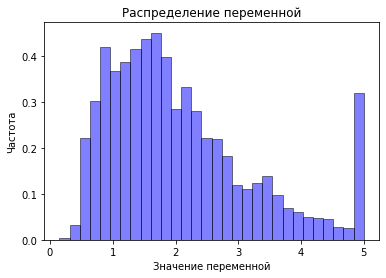

In [108]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(y_train, bins=30, density=True, alpha=0.5, color='b', edgecolor='black')
plt.title('Распределение переменной')
plt.xlabel('Значение переменной')
plt.ylabel('Частота')
plt.show()

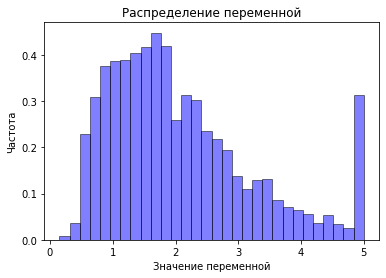

In [109]:
plt.hist(y_test, bins=30, density=True, alpha=0.5, color='b', edgecolor='black')
plt.title('Распределение переменной')
plt.xlabel('Значение переменной')
plt.ylabel('Частота')
plt.show()

In [71]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
for k in range(2, 20) :
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    print(mean_squared_error(neigh.predict(X_test), y_test), k)

1.3076570123454896 2
1.2254041963714262 3
1.185113085019138 4
1.1594144708644052 5
1.1558248101134174 6
1.1503409076623796 7
1.1448551836181742 8
1.1487108514318836 9
1.146141974703138 10
1.1498022074152332 11
1.1546541834687616 12
1.1571500693506183 13
1.1616980180457628 14
1.1652678702978285 15
1.1678641957546878 16
1.1715591239650676 17
1.1773616065112498 18
1.1820091188468258 19


In [72]:
from sklearn.svm import SVR

In [73]:
kernel=['rbf']
for x in kernel :
    clf = SVR(gamma='auto', kernel=x)
    clf.fit(X_train, y_train)
    print(mean_squared_error(clf.predict(X_test), y_test), x)

1.218692417551532 rbf


In [74]:
from sklearn.datasets import make_circles
X, y=make_circles(n_samples=1000, shuffle=True, noise=1, random_state=42, factor=0.99)

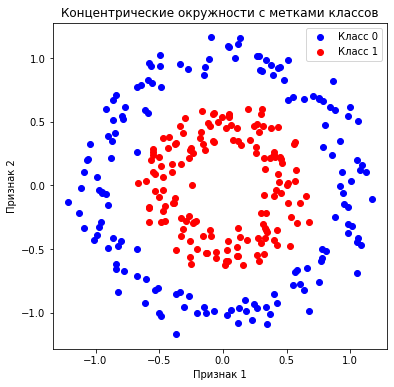

In [75]:


num_samples = 300
noise = 0.1
X, y = make_circles(n_samples=num_samples, noise=noise, factor=0.5)

plt.figure(figsize=(6, 6))

class_0 = X[y == 0]
class_1 = X[y == 1]

plt.scatter(class_0[:, 0], class_0[:, 1], c='b', label='Класс 0')
plt.scatter(class_1[:, 0], class_1[:, 1], c='r', label='Класс 1')

plt.title("Концентрические окружности с метками классов")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()


plt.show()


In [76]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [77]:
kernel=['linear', 'poly', 'rbf', 'sigmoid']
for x in kernel :
    clf = SVC(gamma='auto', kernel=x)
    clf.fit(X_train, y_train)
    print(accuracy_score(clf.predict(X_test), y_test), x)

0.48484848484848486 linear
0.5050505050505051 poly
1.0 rbf
0.5050505050505051 sigmoid


In [78]:
third_feature = X[:, 0] ** 2 + X[:, 1] ** 2
X = np.column_stack((X, third_feature))
print(X)

[[-0.43255848  0.29345773  0.27322428]
 [ 0.67391241 -0.288072    0.53714341]
 [-0.25672611 -0.43577616  0.25580916]
 [-0.00880026  0.53667648  0.28809909]
 [ 0.39164288  0.23109738  0.20679014]
 [-0.6725304   0.77491761  1.05279444]
 [ 0.26812713  0.47912419  0.30145214]
 [-0.2571779  -0.56258446  0.38264174]
 [ 0.45927903 -0.06307542  0.21491574]
 [-0.98561614 -0.39136232  1.12460365]
 [ 0.33161491 -0.33615045  0.22296558]
 [-0.82264858 -0.8411804   1.38433515]
 [ 1.01184642 -0.31597387  1.12367266]
 [ 0.42453747 -0.34947874  0.30236745]
 [-0.52996615 -0.82127494  0.95535665]
 [ 0.43158246  0.92433383  1.04065645]
 [ 0.75120024 -0.76098248  1.14339613]
 [ 0.26851391 -0.9606106   0.99487244]
 [ 0.51534932  0.66950403  0.71382056]
 [-0.67360866  0.26104299  0.52189207]
 [ 0.30027382 -0.45549903  0.29764373]
 [ 0.78836785  0.30426885  0.7141034 ]
 [ 0.45944128  0.20932094  0.25490155]
 [ 0.11062785 -0.48749424  0.24988916]
 [-0.32917072 -0.26037142  0.17614664]
 [ 0.341784    0.98522613

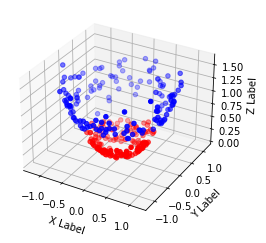

In [80]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


class_0 = X[y == 0]
class_1 = X[y == 1]

ax.scatter(class_0[:, 0], class_0[:, 1], class_0[:, 2], c='b', label='Класс 0')
ax.scatter(class_1[:, 0], class_1[:, 1], class_1[:, 2], c='r', label='Класс 1')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [33]:
kernel=['linear', 'poly', 'rbf', 'sigmoid']
for x in kernel :
    clf = SVC(gamma='auto', kernel=x)
    clf.fit(X_train, y_train)
    print(accuracy_score(clf.predict(X_test), y_test), x)

1.0 linear
0.9797979797979798 poly
1.0 rbf
1.0 sigmoid


In [94]:
import numpy as np
np.random.seed(42)

sample_size = 100
X = np.random.uniform(-10, 10, sample_size)
mean = 0
std_dev = 10
eps = np.random.normal(mean, std_dev, sample_size)
Y = X**2 - 1/10*X**3 + eps
#print(eps)

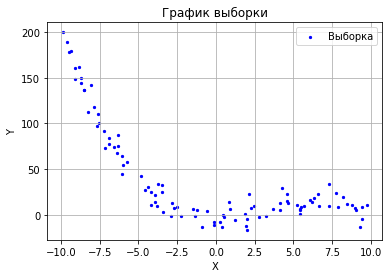

In [86]:
import matplotlib.pyplot as plt
plt.scatter(X, Y, s=5, c='b', label='Выборка')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('График выборки')
plt.legend()
plt.grid(True)
plt.show()

In [98]:
X=X[:, np.newaxis]
print(len(X), len(Y))

100 100


C:\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:245: RuntimeWarning: invalid value encountered in true_divide
  y_pred[:, j] = num / denom


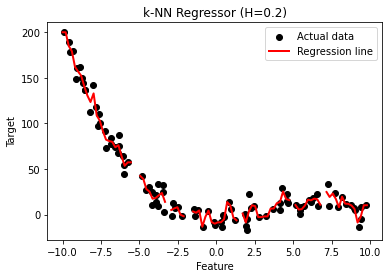

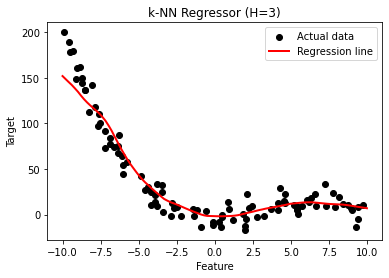

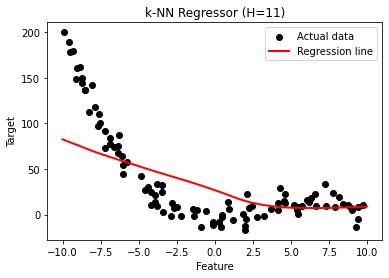

In [105]:


def train_and_visualize_regressor(regressor, title):
    regressor.fit(X, Y)
    x_range = np.linspace(-10, 10, 100).reshape(-1, 1)
    y_pred = regressor.predict(x_range)
    plt.scatter(X, Y, color='black', label='Actual data')
    plt.plot(x_range, y_pred, color='red', linewidth=2, label='Regression line')
    plt.title(title)
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()
    plt.show()

for k in [0.2, 3, 11]:
    epanechnikov_kernel = lambda d: np.maximum(0, 3/4 * (1 - (d/k)**2))  
    knn_regressor = KNeighborsRegressor(n_neighbors=100, weights=epanechnikov_kernel)
    title = f'k-NN Regressor (H={k})'
    train_and_visualize_regressor(knn_regressor, title)